# Lab Exercise: Time Series Visualization with Pandas

<hr style="border: 2px solid black;">


Lab Exercise: Time Series Visualization with Pandas

Introduction
------------

This lab guides you through the fundamental concepts of time series manipulation
and visualization using the Pandas library in Python. We'll cover data loading,
date/time conversion, feature extraction, aggregation, resampling, and basic
statistical analysis for time series data. We will also explore how to identify
outliers and understand autocorrelation.

Dataset
-------

We'll be using the "AirPassengersDates.csv" dataset, which contains the monthly
totals of international airline passengers from 1949 to 1960.

Objectives
----------

By the end of this lab, you should be able to:

* Load time series data from a CSV file.
* Convert date columns to datetime objects.
* Extract date components (month, day, day name).
* Aggregate time series data.
* Create basic time series visualizations (line plots, bar plots).
* Calculate and visualize descriptive statistics (mean, standard deviation).
* Understand and calculate z-scores for outlier detection.
* Perform upsampling and downsampling.
* Understand and use shift and tshift for lag analysis.
* Calculate and visualize autocorrelation.


<hr style="border: 2px solid black;">





**Section 1: Setting Up and Loading Data**

This section focuses on preparing the environment and loading the dataset.
First, we import the necessary libraries: `pandas` for data manipulation,
`numpy` for numerical operations, `matplotlib.pyplot` for basic plotting,
`seaborn` for enhanced visualizations, and `pathlib.Path` for handling file paths.
Then, we define the location of our dataset using `DATA_PATH`.
Finally, we load the "AirPassengersDates.csv" file into a pandas DataFrame called
`passenger_df` and use `passenger_df.head()` and `passenger_df.info()`
to inspect the data's first few rows and its overall structure. This initial
inspection is crucial for understanding the data before analysis.
<hr style="border: 2px solid black;">

In [2]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column, row
from bokeh.transform import dodge
from bokeh.palettes import Category10
from bokeh.models.tools import BoxZoomTool, ResetTool, PanTool, WheelZoomTool
import warnings
warnings.filterwarnings('ignore')

output_notebook()



Loading BokehJS ...

In [5]:

# Chargement des données avec correction
df = pd.read_csv('./datasets/AirPassengersDates.csv')
df.columns = df.columns.str.strip()  # Supprime les éventuels espaces
df
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()


,#Passengers
Date,
1949-01-12,112
1949-02-24,118
1949-03-22,132
1949-04-05,129
1949-05-24,121


<hr style="border: 2px solid black;">

**Section 2: Date/Time Manipulation**

This section demonstrates how to handle date and time data using pandas.
First, we convert the "Date" column to datetime objects using `pd.to_datetime()`,
which enables us to perform time-based operations.
Then, we extract useful date components such as the month, day, and day name
from the "Date" column, creating new columns in the DataFrame.
This process is essential for time series analysis, as it allows us to analyze
data at different time granularities. Finally, we use `passenger_df.info()`
and `passenger_df.head()` to verify the data types and structure.

<hr style="border: 2px solid black;">

In [4]:
source = ColumnDataSource(data={
    'x': df.index,
    'y': df['#Passengers']
})

p = figure(x_axis_type='datetime', title='Monthly Air Passengers Over Time',
           width=800, height=300, tools="hover,pan,box_zoom,reset,wheel_zoom",
           tooltips=[('Date', '@x{%F}'), ('Passengers', '@y')],
           formatters={'@x': 'datetime'})

p.line('x', 'y', source=source, line_width=2, color='navy', legend_label='Passengers')
p.circle('x', 'y', source=source, size=4, color='orange')

p.legend.location = "top_left"
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Number of Passengers'

show(p)



AttributeError: unexpected attribute 'formatters' to figure, possible attributes are above, active_drag, active_inspect, active_multi, active_scroll, active_tap, align, aspect_ratio, aspect_scale, attribution, background_fill_alpha, background_fill_color, background_hatch_alpha, background_hatch_color, background_hatch_extra, background_hatch_pattern, background_hatch_scale, background_hatch_weight, below, border_fill_alpha, border_fill_color, border_hatch_alpha, border_hatch_color, border_hatch_extra, border_hatch_pattern, border_hatch_scale, border_hatch_weight, center, context_menu, css_classes, css_variables, disabled, elements, extra_x_ranges, extra_x_scales, extra_y_ranges, extra_y_scales, flow_mode, frame_align, frame_height, frame_width, height, height_policy, hidpi, hold_render, html_attributes, html_id, inner_height, inner_width, js_event_callbacks, js_property_callbacks, left, lod_factor, lod_interval, lod_threshold, lod_timeout, margin, match_aspect, max_height, max_width, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, min_height, min_width, name, outer_height, outer_width, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, output_backend, renderers, reset_policy, resizable, right, sizing_mode, styles, stylesheets, subscribed_events, syncable, tags, title, title_location, toolbar, toolbar_inner, toolbar_location, toolbar_sticky, tools, tooltips, visible, width, width_policy, window_axis, x_axis_label, x_axis_location, x_axis_type, x_minor_ticks, x_range, x_scale, y_axis_label, y_axis_location, y_axis_type, y_minor_ticks, y_range or y_scale

**2. Aggregation and Bar Plot**

This section demonstrates how to aggregate time series data and visualize it using a bar plot.
We first group the data by the "Month" column and calculate the total number of passengers
for each month using `groupby()` and `sum()`. Then, we reset the index to make
"Month" a column again, which is necessary for plotting. Finally, we create a bar plot
using seaborn's `sns.barplot()` to visualize the total passengers for each month.
Bar plots are effective for comparing categorical data (months) against numerical data (passenger counts).

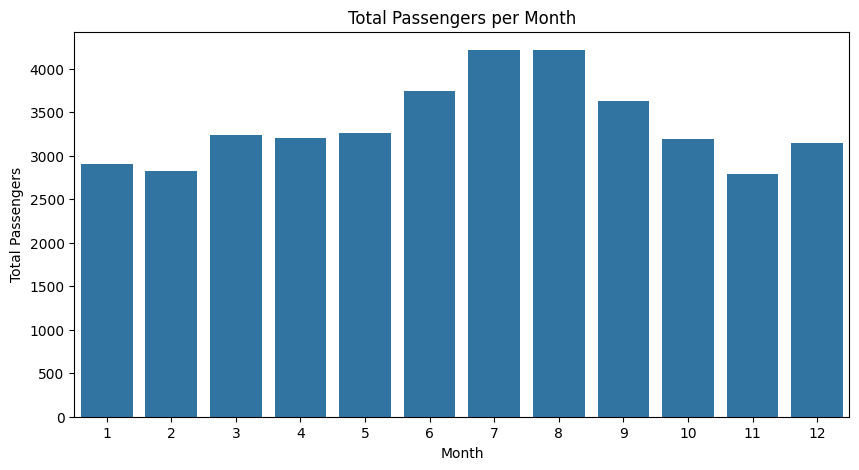

In [24]:
# 2. Aggregation and Bar Plot
# ~~~~~~~~~~~~~~~~~~~~~~~~~

passengers_per_month = (
    passenger_df.groupby("Month")["#Passengers"].sum().reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="#Passengers", data=passengers_per_month)
plt.title("Total Passengers per Month")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.show()



**3. Mean and Standard Deviation**

This section demonstrates how to calculate and visualize the mean and standard deviation of the time series data.
We first calculate the mean and standard deviation of the "#Passengers" column using `mean()` and `std()`.
Then, we create a line plot of the original time series and add horizontal lines to represent the mean,
as well as one standard deviation above and below the mean. This visualization helps to understand
the central tendency and variability of the data over time, providing insights into its overall behavior
and potential fluctuations.

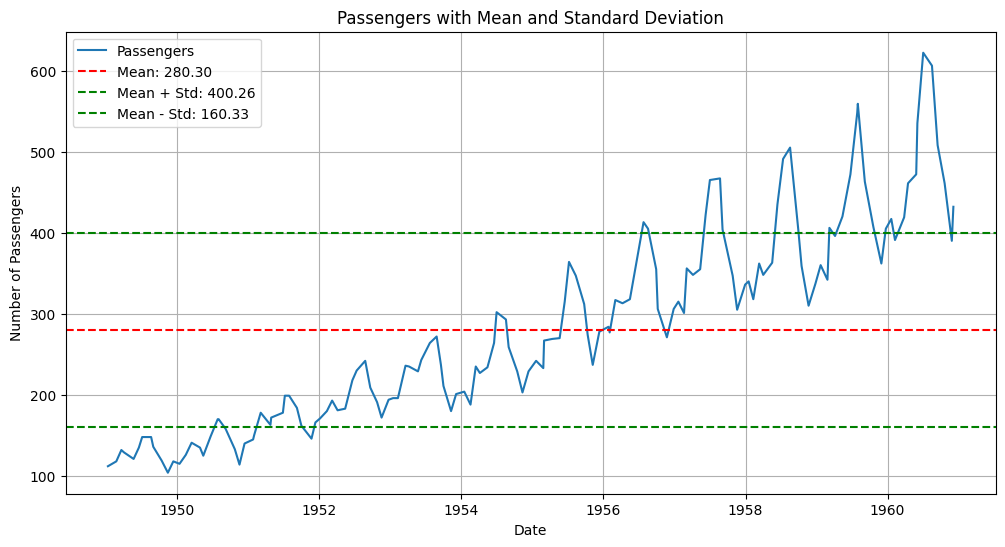

In [25]:
# 3. Mean and Standard Deviation
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

mean_passengers = passenger_df["#Passengers"].mean()
std_passengers = passenger_df["#Passengers"].std()

plt.figure(figsize=(12, 6))
plt.plot(passenger_df["Date"], passenger_df["#Passengers"], label="Passengers")
plt.axhline(
    mean_passengers, color="r", linestyle="--", label=f"Mean: {mean_passengers:.2f}"
)
plt.axhline(
    mean_passengers + std_passengers,
    color="g",
    linestyle="--",
    label=f"Mean + Std: {mean_passengers + std_passengers:.2f}",
)
plt.axhline(
    mean_passengers - std_passengers,
    color="g",
    linestyle="--",
    label=f"Mean - Std: {mean_passengers - std_passengers:.2f}",
)
plt.title("Passengers with Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()



**Section 4: Outlier Detection**

This section demonstrates how to detect potential outliers in the time series data using z-scores.
First, we calculate the z-score for each data point in the "#Passengers" column.
The z-score measures how many standard deviations a data point is away from the mean.
Then, we calculate the absolute value of the z-scores.
Finally, we sort the DataFrame by the absolute z-score in descending order and print the top 10 rows.
This allows us to identify the data points that are furthest from the mean, which are likely to be outliers.

In [26]:
# %%
# Section 4: Outlier Detection
# ----------------------------

# 1. Z-Score Calculation
# ~~~~~~~~~~~~~~~~~~~~

passenger_df["Z-Score"] = (
    passenger_df["#Passengers"] - passenger_df["#Passengers"].mean()
) / passenger_df["#Passengers"].std()
passenger_df["Absolute_Z-Score"] = abs(passenger_df["Z-Score"])

print(passenger_df.sort_values(by="Absolute_Z-Score", ascending=False).head(10))



          Date  #Passengers  Month  Day   Day_Name   Z-Score  Absolute_Z-Score
138 1960-07-02          622      7    2   Saturday  2.848311          2.848311
139 1960-08-16          606      8   16    Tuesday  2.714940          2.714940
127 1959-08-01          559      8    1   Saturday  2.323164          2.323164
126 1959-07-29          548      7   29  Wednesday  2.231471          2.231471
137 1960-06-02          535      6    2   Thursday  2.123108          2.123108
140 1960-09-14          508      9   14  Wednesday  1.898044          1.898044
115 1958-08-18          505      8   18     Monday  1.873037          1.873037
114 1958-07-13          491      7   13     Sunday  1.756338          1.756338
136 1960-05-27          472      5   27     Friday  1.597960          1.597960
125 1959-06-24          472      6   24  Wednesday  1.597960          1.597960


**2. Outlier Visualization**

This section visualizes the outliers identified using z-scores on the time series plot.
We first filter the DataFrame to select the data points that have an absolute z-score greater than 2,
considering them as potential outliers. Then, we create a line plot of the original time series data.
Finally, we use a scatter plot to highlight the identified outliers on the same graph,
making it easy to visually distinguish them from the normal data points.
This visualization helps to understand the magnitude and timing of the outliers within the context of the overall time series.

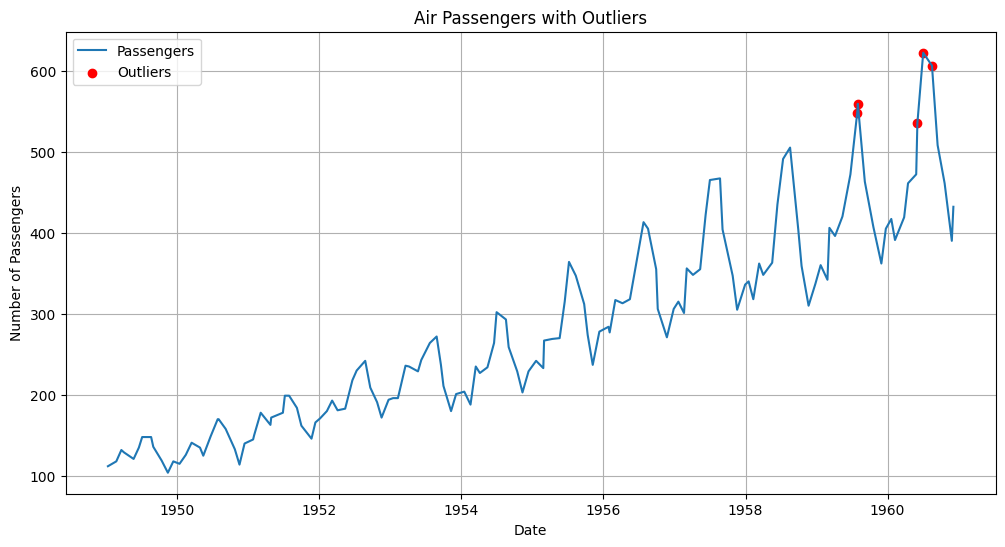

In [27]:
# 2. Outlier Visualization
# ~~~~~~~~~~~~~~~~~~~~~~~

outliers = passenger_df[(passenger_df["Absolute_Z-Score"] > 2)]  # Define outliers

plt.figure(figsize=(12, 6))
plt.plot(passenger_df["Date"], passenger_df["#Passengers"], label="Passengers")
plt.scatter(outliers["Date"], outliers["#Passengers"], color="red", label="Outliers")
plt.title("Air Passengers with Outliers")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()



This section demonstrates how to resample time series data, specifically focusing on upsampling.
Resampling involves changing the frequency of the time series. Upsampling increases the frequency
(e.g., from monthly to daily), which can be useful for visualizing data at a finer granularity or for
certain types of analysis.

First, we set the 'Date' column as the index of the DataFrame, as resampling operations in pandas
require a DatetimeIndex. Then, we perform upsampling to daily frequency using `resample('D').asfreq()`.
This creates new data points for each day, but the values for these new points will be missing (NaN).
To fill these missing values, we use interpolation with `interpolate(method='linear')`.

Finally, we visualize the upsampled and interpolated data alongside the original data to compare the results.
This visualization helps to see how upsampling affects the time series and how interpolation creates
a smoother, higher-resolution representation.

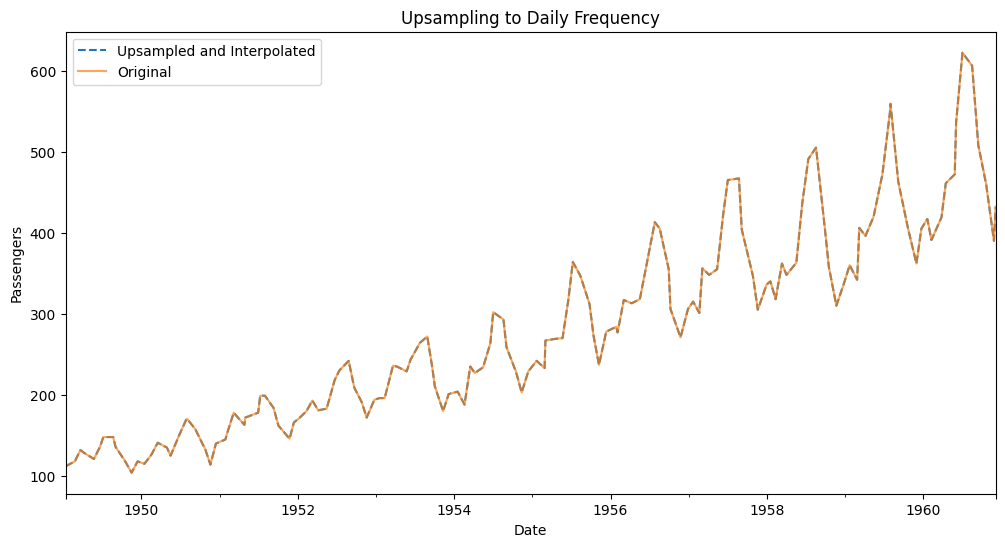

In [28]:
# %%
# Section 5: Resampling
# ----------------------

passenger_df.set_index(
    "Date", inplace=True
)  # Set 'Date' as index for resampling

# 1. Upsampling
# ~~~~~~~~~~~~

# Upsample to daily frequency
daily_passengers = passenger_df.resample('D').asfreq()

# Interpolate missing values
daily_passengers['#Passengers'] = daily_passengers['#Passengers'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
daily_passengers['#Passengers'].plot(label='Upsampled and Interpolated', linestyle='--')
passenger_df['#Passengers'].plot(label='Original', alpha=0.7)  # Plot original data for comparison
plt.title('Upsampling to Daily Frequency')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


**2. Downsampling**

This section demonstrates downsampling, which is the process of reducing the frequency of the time series
(e.g., from monthly to yearly). Downsampling is often used to summarize data and observe long-term trends.

In this code, we downsample the data to a yearly frequency using `resample('Y')`.
For each year, we calculate the average number of passengers using `mean()`.
This aggregates the monthly data into yearly averages, smoothing out short-term fluctuations.

We then visualize the downsampled yearly averages along with the original monthly data.
This allows us to compare the overall trend with the more detailed, higher-frequency data,
highlighting the smoothing effect of downsampling and making long-term patterns clearer.

C:\Users\enele\AppData\Local\Temp\ipykernel_38804\3284838097.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_passengers = passenger_df.resample("Y")["#Passengers"].mean()


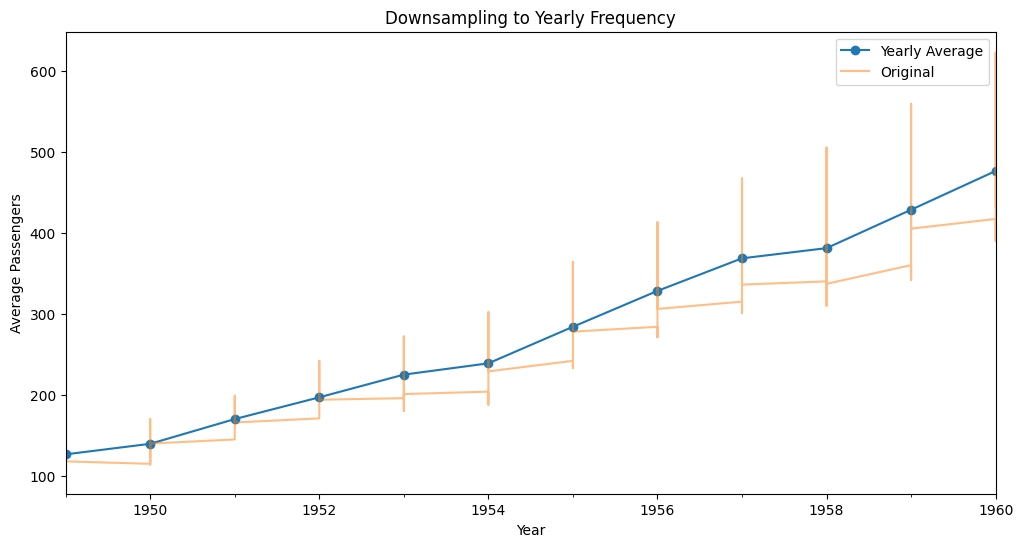

In [29]:

# 2. Downsampling
# ~~~~~~~~~~~~~~

# Downsample to yearly frequency
yearly_passengers = passenger_df.resample("Y")["#Passengers"].mean()

plt.figure(figsize=(12, 6))
yearly_passengers.plot(marker="o", label="Yearly Average")
passenger_df["#Passengers"].plot(alpha=0.5, label="Original")  # Original data
plt.title("Downsampling to Yearly Frequency")
plt.xlabel("Year")
plt.ylabel("Average Passengers")
plt.legend()
plt.show()



This section demonstrates how to use the `shift()` function in pandas to perform lag analysis.
Lag analysis involves examining how past values of a time series relate to current values.

The `shift()` function can shift the data or the index of a time series.
Here, we first ensure that the "Date" column is not the index (by resetting it, though the inplace=False makes this line not effective).
Then, we create two new columns:
- "#Passengers_Shift" is created by shifting the "#Passengers" column by one period (i.e., lagging it by one row).
- "#Passengers_tShift" is created by shifting the "#Passengers" column using the `freq` argument to shift the index by one month start ("MS").

The `shift()` function is useful for calculating differences, rates of change, and identifying patterns based on previous time periods.

            #Passengers  Month  Day   Day_Name   Z-Score  Absolute_Z-Score  \
Date                                                                         
1949-01-12          112      1   12  Wednesday -1.402882          1.402882   
1949-02-24          118      2   24   Thursday -1.352868          1.352868   
1949-03-22          132      3   22    Tuesday -1.236169          1.236169   
1949-04-05          129      4    5    Tuesday -1.261176          1.261176   
1949-05-24          121      5   24    Tuesday -1.327861          1.327861   

            #Passengers_Shift  #Passengers_tShift  
Date                                               
1949-01-12                NaN                 NaN  
1949-02-24              112.0                 NaN  
1949-03-22              118.0                 NaN  
1949-04-05              132.0                 NaN  
1949-05-24              129.0                 NaN  


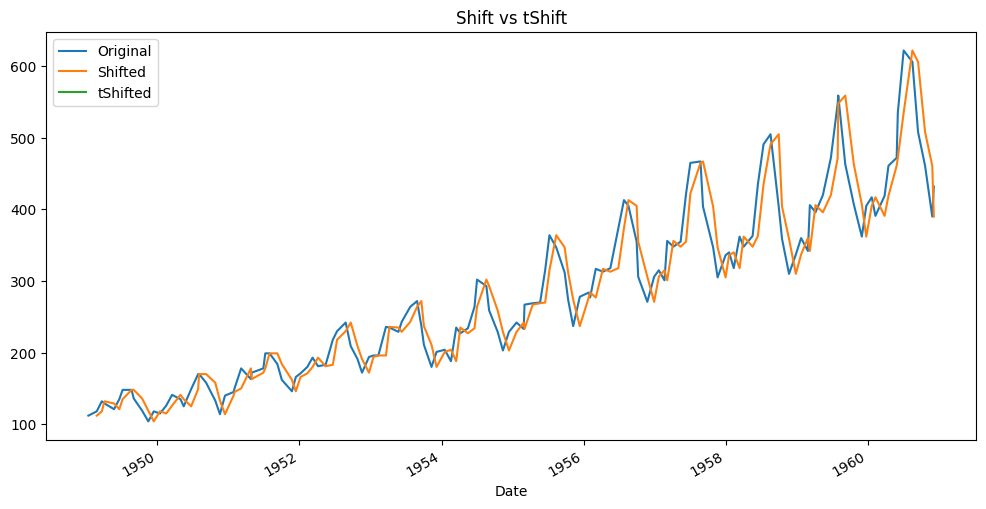

In [30]:
# %%
# Section 6: Shift and tshift (Lag Analysis)
# -----------------------------------------

# 1. Using `shift()` for Lag Analysis
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Ensure 'Date' is the index (DatetimeIndex)
#passenger_df.set_index("Date", inplace=True)

passenger_df.reset_index(inplace=False)  # Reset index to use Date as column

passenger_df["#Passengers_Shift"] = passenger_df["#Passengers"].shift(
    periods=1
)  # Shift data by 1 period
passenger_df["#Passengers_tShift"] = passenger_df["#Passengers"].shift(
    periods=1, freq="MS"
)  # Shift index by 1 month start

print(passenger_df.head())

# Visualization
plt.figure(figsize=(12, 6))
passenger_df["#Passengers"].plot(label="Original")
passenger_df["#Passengers_Shift"].plot(label="Shifted")
passenger_df["#Passengers_tShift"].plot(label="tShifted")
plt.title("Shift vs tShift")
plt.legend()
plt.show()


This section demonstrates how to visualize autocorrelation in the time series data using the Autocorrelation Function (ACF) plot.
Autocorrelation measures the correlation between a time series and its lagged values.
It helps to identify patterns and dependencies in the data over time.

We use the `plot_acf` function from the `statsmodels` library to create the ACF plot.
The x-axis of the plot represents the lag (the number of time periods to shift),
and the y-axis represents the autocorrelation coefficient (a value between -1 and 1, indicating the strength and direction of the correlation).

By analyzing the ACF plot, we can determine how strongly each past observation is correlated with the current observation,
which is crucial for understanding the underlying dynamics of the time series and for building predictive models.


In [33]:
# %%
# Section 7: Autocorrelation
# --------------------------

# 1. Autocorrelation Plot
# ~~~~~~~~~~~~~~~~~~~~~~

from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 5))
plot_acf(passenger_df["#Passengers"], lags=30, ax=plt.gca(), title="Autocorrelation Function (ACF)")  # Use lags up to 30
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()




ModuleNotFoundError: No module named 'statsmodels'